In [1]:
from stable_baselines import DDPG
import seagul.envs

import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

import numpy as np
import matplotlib.pyplot as plt

env_name = 'su_acrobot-v0'
#env_name = 'mj_su_cartpole-v0'
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

model = DDPG('MlpPolicy', env, 
             #nb_rollout_steps=500,
             #normalize_observations=True,
             #batch_size = 512,
             verbose=True,
            )
model.learn(300000, seed=4)


/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sgillen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

--------------------------------------
| reference_Q_mean        | -10.6    |
| reference_Q_std         | 3.15     |
| reference_action_mean   | 0.23     |
| reference_action_std    | 0.55     |
| reference_actor_Q_mean  | -10.2    |
| reference_actor_Q_std   | 3.08     |
| rollout/Q_mean          | -6.04    |
| rollout/actions_mean    | -0.27    |
| rollout/actions_std     | 0.597    |
| rollout/episode_steps   | 1.5e+03  |
| rollout/episodes        | 6        |
| rollout/return          | -3.5e+03 |
| rollout/return_history  | -3.5e+03 |
| total/duration          | 26.5     |
| total/episodes          | 6        |
| total/epochs            | 1        |
| total/steps             | 9998     |
| total/steps_per_second  | 378      |
| train/loss_actor        | 10.2     |
| train/loss_critic       | 0.146    |
| train/param_noise_di... | 0        |
--------------------------------------

---------------------------------------
| reference_Q_mean        | -18.6     |
| reference_Q_std     

1499
[-2904.28628844]


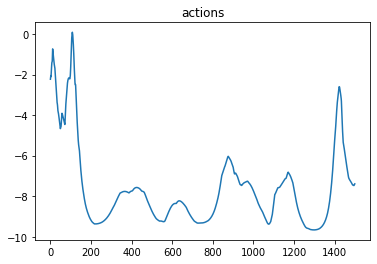

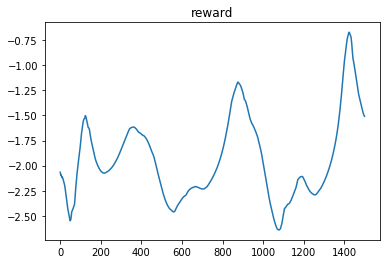

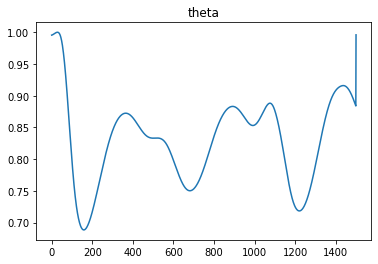

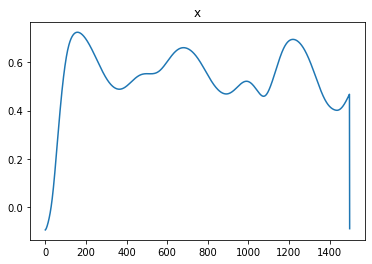

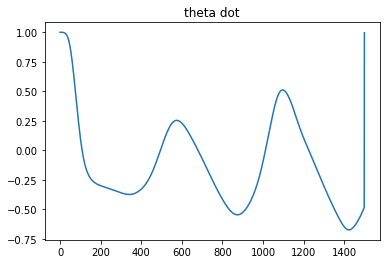

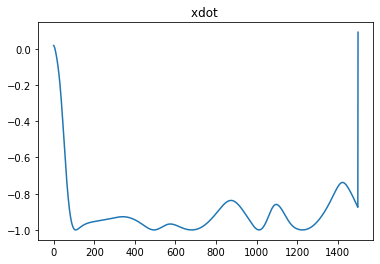

In [5]:
myenv = env
myenv.num_steps=1500

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()
model.hyst_state = 0

for i in range(myenv.num_steps):
        actions, _states, = model.predict(obs)
        #actions = np.ones(1)*100
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        env.render()
        if done:
            break

plt.plot(action_hist)
plt.title('actions')

plt.figure()
plt.plot(reward_hist)
plt.title('reward')

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")



print(i)
print(sum(reward_hist))


In [ ]:
from numpy import pi

def control(env, q):
    k1 = 140.560
    k2 = -3.162
    k3 = 41.772
    k4 = 0#-8.314
    u = -4*(k1 * (q[0] - pi) + k2 * q[1] + k3 * q[2] + k4 * q[3])
    return u

myenv = env
myenv.num_steps=400

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))
path_hist = np.zeros((myenv.num_steps,1))

obs = env.reset()
#env.state[0] = np.pi
model.hyst_state = 0

for i in range(myenv.num_steps):
        if ((155 * pi/180 < obs[0][0] < 220 * pi/180)):
            actions = np.array(control(env, obs[0]))/50
            #actions = np.zeros(1)
            path_hist[i]  = 1
        
        else:
            actions, _,  = model.predict(obs)
            path_hist[i] = 0
            
        
        actions = np.clip(actions, -75, 75)
        #actions = np.zeros(1)
        obs, reward, done, _ = env.step(np.array(actions).reshape(-1,1))
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.title('action')


plt.figure()
plt.plot(path_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")

print(i)
print(sum(reward_hist))